In [1]:
import  tensorflow as  tf

In [2]:
from  skimage import  data

In [3]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
import  matplotlib 
%matplotlib inline
plt.style.use('ggplot')

In [5]:
img=data.camera().astype(np.float32)

In [6]:
img.shape

(512, 512)

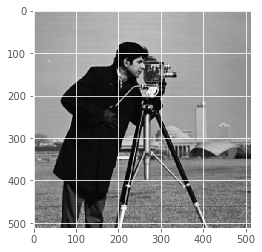

In [7]:
plt.imshow(img,cmap='gray')

In [8]:
img_4d=img.reshape([1,img.shape[0],img.shape[1],1])

In [9]:
img_4d.shape

(1, 512, 512, 1)

In [10]:
 img_4d=tf.reshape(img,[1,img.shape[0],img.shape[1],1])

In [11]:
img_4d

<tf.Tensor 'Reshape:0' shape=(1, 512, 512, 1) dtype=float32>

In [17]:
img_4d.get_shape().as_list()

[1, 512, 512, 1]

In [21]:
g2=tf.Graph()

In [22]:
sess=tf.Session(graph=g2)

In [23]:
 sess=tf.InteractiveSession()

In [24]:
x=tf.linspace(-3.0,3.0,100)

In [25]:
mean=0

In [26]:
sigma=1.0

In [27]:
z=tf.exp(tf.negative(tf.pow(x-mean,2.0)/
                (2.0*tf.pow(sigma,2.0))))*(1.0/(sigma*tf.sqrt(2.0*3.1415)))

In [28]:
res=z.eval()
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/root/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
ksize=z.get_shape().as_list()[0]

In [31]:
print('kernel size ',ksize)

kernel size  100


In [32]:
z_2d=tf.matmul(tf.reshape(z,[ksize,1]),tf.reshape(z,[1,ksize]))

In [38]:
z_2d.shape.as_list()

[100, 100]

In [40]:
z_4d=tf.reshape(z_2d,[ksize,ksize,1,1])

In [42]:
z_4d.shape.as_list()

[100, 100, 1, 1]

In [43]:
######################################convolving the image#########################################

In [44]:
convolved=tf.nn.conv2d(img_4d,z_4d,strides=[1,1,1,1],padding='SAME')

In [45]:
res=convolved.eval()

In [46]:
#strides   says how to move    the kernel   by  1   pixel

In [47]:
#padding  says   what to   do  at the borders 

In [50]:
print(res.shape)

(1, 512, 512, 1)


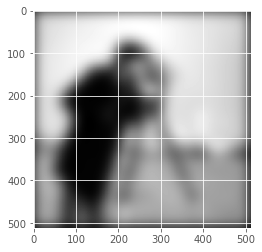

In [52]:
%matplotlib inline
plt.imshow(np.squeeze(res),cmap='gray')

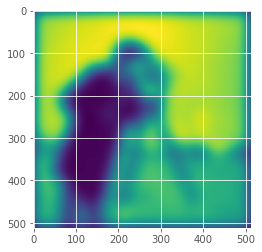

In [54]:
plt.imshow(res[0,:,:,0])

In [56]:
##################Gabor    kernel=sinwave*  gaussian

In [57]:
xs=tf.linspace(-3.0,3.0,ksize)

In [58]:
ys=tf.sin(xs)

In [61]:
plt.figure()

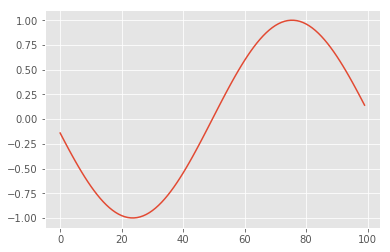

In [62]:
plt.plot(ys.eval())

In [63]:
ys=tf.reshape(ys,[ksize,1])

In [66]:
ys.shape.as_list()

[100, 1]

In [68]:
ones=tf.ones((1,ksize))

In [69]:
wave=tf.matmul(ys,ones)

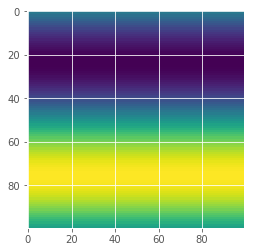

In [70]:
plt.imshow(wave.eval())

In [74]:
gabor=tf.matmul(wave,z_2d)

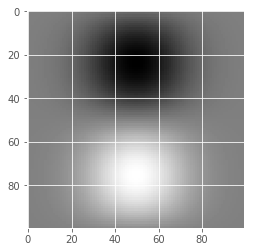

In [77]:
plt.imshow(gabor.eval(),cmap='gray')

In [78]:
#Using placeholders

In [79]:
img=tf.placeholder(tf.float32,shape=[None,None],name='img')

In [80]:
img_3d=tf.expand_dims(img,2)

In [81]:
dims=img_3d.get_shape()

In [82]:
dims

TensorShape([Dimension(None), Dimension(None), Dimension(1)])

In [84]:
img_4d=tf.expand_dims(img_3d,0)

In [85]:
print(img_4d.shape.as_list())

[1, None, None, 1]


In [86]:
#placholder  for  gabor params

In [87]:
mean=tf.placeholder(tf.float32,name='mean')

In [88]:
sigma=tf.placeholder(tf.float32,name='sigma')

In [89]:
ksize=tf.placeholder(tf.int32,name='ksize')

In [90]:
x=tf.linspace(-3.0,3.0,ksize)

In [95]:
z=tf.exp(tf.negative(tf.pow(x-mean,2.0)/
                (2.0*tf.pow(sigma,2.0))))*(1.0/(sigma*tf.sqrt(2.0*3.1415)))

In [102]:
z_2d=tf.matmul(
    tf.reshape(z,tf.stack([ksize,1])),
    tf.reshape(z,tf.stack([1,ksize]))
)

In [103]:
ys=tf.sin(x)

In [104]:
ys=tf.reshape(ys,tf.stack([ksize,1]))

In [107]:
ones=tf.ones(tf.stack([1,ksize]))

In [108]:
wave=tf.matmul(ys,ones)

In [109]:
gabor=tf.matmul(wave,z_2d)

In [115]:
gabor_4d=tf.reshape(gabor,tf.stack([ksize,ksize,1,1]))

In [116]:
convolved=tf.nn.conv2d(img_4d,gabor_4d,strides=[1,1,1,1],padding='SAME',name='convolved')

In [117]:
convolved_img=convolved[0,:,:,0]

In [120]:
res=convolved_img.eval(feed_dict={
    img:data.camera(),
    mean:0.0,
    sigma:1.0,
    ksize:100
    
})

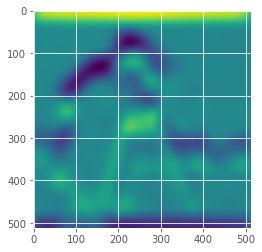

In [122]:
plt.imshow(res)